In [6]:
from capitals4py import container
from qlib.data import D
import mplfinance as mpf
import pandas as pd

In [2]:
qlib_service = container.qlib_service()
qlib_service.qlib_init("us")

[46560:MainThread](2025-07-16 13:04:23,648) INFO - qlib.Initialization - [config.py:420] - default_conf: client.
[46560:MainThread](2025-07-16 13:04:23,650) WARNING - qlib.Initialization - [config.py:427] - Unrecognized config exists_skip
[46560:MainThread](2025-07-16 13:04:24,461) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[46560:MainThread](2025-07-16 13:04:24,463) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('D:/jxch-capital/capitals4py/data/qlib/data/us')}


In [9]:
df = D.features(
        ["AAPL"], ["$close", "$open", "$high", "$low", "$volume", "EMA($close, 20)"],
        start_time="2010-09-01", end_time="2011-09-25"
    )
df

$close      $open      $high       $low  \
instrument datetime                                                 
AAPL       2010-09-01   9.739281   9.628010   9.783244   9.581713   
           2010-09-02   9.810869   9.775466   9.810869   9.670809   
           2010-09-03  10.067644   9.924471  10.068033   9.901517   
           2010-09-07  10.030297   9.984777  10.097215   9.969604   
           2010-09-08  10.229104  10.106939  10.286296  10.080484   
...                          ...        ...        ...        ...   
           2011-09-19  16.014782  15.445591  16.077030  15.375560   
           2011-09-20  16.085588  16.155619  16.451693  15.997661   
           2011-09-21  16.034622  16.326414  16.402281  16.029175   
           2011-09-22  15.633121  15.602386  15.944367  15.433924   
           2011-09-23  15.729607  15.573206  15.824536  15.556477   

                           $volume  EMA($close, 20)  
instrument datetime                                  
AAPL       2010-09-01  639858816.0         9.605903  
           2010-09-02  381349536.0         9.628141  
           2010-09-03  478068000.0         9.675204  
           2010-09-07  314457216.0         9.712783  
           2010-09-08  483357664.0         9.766851  
...                            ...              ...  
           2011-09-19  756278592.0        15.018575  
           2011-09-20  712118144.0        15.120195  
           2011-09-21  556267200.0        15.207284  
           2011-09-22  889035008.0        15.247840  
           2011-09-23  501465344.0        15.293722  

[269 rows x 6 columns]

In [10]:
df2 = df.rename(columns={"$open": "open", "$high": "high", "$low": "low", "$close": "close", "$volume": "volume"})
df2 = df2.xs("AAPL", level="instrument")
df2 = df2.reset_index()
df2["datetime"] = pd.to_datetime(df2["datetime"])
df2 = df2.set_index("datetime")
df2


,close,open,high,low,volume,"EMA($close, 20)"
datetime,,,,,,
2010-09-01,9.739281,9.628010,9.783244,9.581713,639858816.0,9.605903
2010-09-02,9.810869,9.775466,9.810869,9.670809,381349536.0,9.628141
2010-09-03,10.067644,9.924471,10.068033,9.901517,478068000.0,9.675204
2010-09-07,10.030297,9.984777,10.097215,9.969604,314457216.0,9.712783
2010-09-08,10.229104,10.106939,10.286296,10.080484,483357664.0,9.766851
...,...,...,...,...,...,...
2011-09-19,16.014782,15.445591,16.077030,15.375560,756278592.0,15.018575
2011-09-20,16.085588,16.155619,16.451693,15.997661,712118144.0,15.120195
2011-09-21,16.034622,16.326414,16.402281,16.029175,556267200.0,15.207284


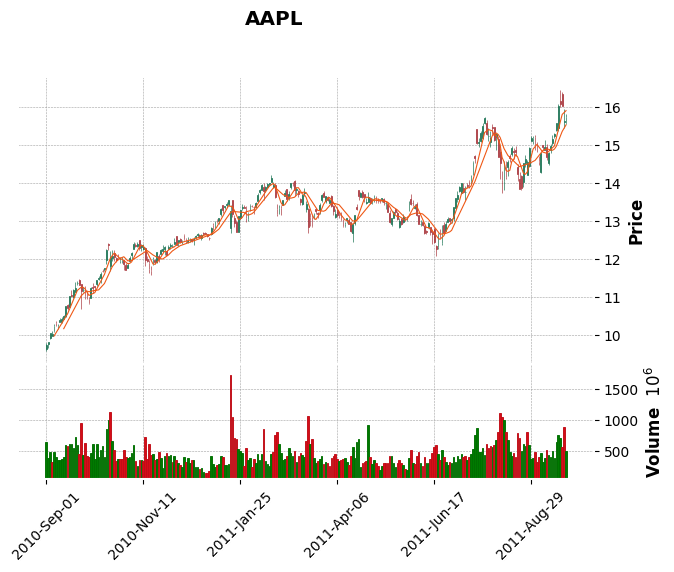

In [12]:
mpf.plot(
    df2,
    type="candle",
    volume=True,
    mav=(5, 10),
    title="AAPL",
    style="charles"
)